In [54]:
import pandas as pd 
import re
import time
import requests
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import urllib.request
import urllib.error

In [146]:
# Read projects file  
df = pd.read_csv(r"useddata - Copy.csv", encoding ="utf-8") 

In [147]:
#Get rid of projects that don't have a half a year's worth of records ofter their end and where at least from 2017
dropList = []
for index, project in df.iterrows(): 
    endtime = datetime.strptime(project['end'], '%Y-%m-%d %H:%M:%S')
    if endtime > datetime.now()-timedelta(days = 365):
        df.drop(index, inplace=True)
    if endtime < datetime.now()-timedelta(days = (365*4)):
        df.drop(index, inplace=True)

In [148]:
#Get rid of projects with 1 or no observers
for index, project in df.iterrows(): 
    if project['observers'] < 2:
        df.drop(index, inplace=True)

In [149]:
df.count()

Unnamed: 0          840
createdAt           840
description         797
duration            840
end                 840
hours               840
identifiers         840
isUmbrella          840
location            840
observationRule     840
observations        840
observers           840
placeID             840
projectID           840
projectType           0
project_type        840
rulePreferences     840
searchParameters    840
slug                840
species             840
start               840
dtype: int64

In [170]:
#df.drop([1119,545,593,998,476,911,1124], inplace=True)
        
#df.drop([1271,984,669,1416,496,758,1219,422,1013,1023,589,1174,1152], inplace=True)

#df.drop([673,542,1266,577,891,727,993,492,503,445,1440,738,1265,1078,793,967,1044,377,704,1015], inplace=True)

#df.drop([1405,1070,1243,1231,918,1439,1026,860,1269,447,914,549,792,659,715,537,507,378,1400,1250], inplace=True)

#df.drop([778,1043,1257,1369,654,1379,677,826,736,449,1220,551,790,765,1144,539,509,403,1209,922], inplace=True)

#df.drop([1408,557,900,622,862,1411,1127,1253,745,555,1120,707,734,1029,505,958,695,852,473,640], inplace=True)

#df.drop([1336], inplace=True)
#df.drop([1236], inplace=True)
#df.drop([815,1074,571,716,859,705,1133,576,874,1029,431,963,561,443,654,423,437,598,516,735,1050,497,1230,725,677,1321,1389,1445,1096,461,750,587], inplace=True)
#df.drop([779,786,706,1391,934,1051,1295,766,810,1098,1431,378,983,754,848,784,1352,504,764,989,1004,737,603,456,778,1211,582,700,707,1215,544,430,832,1048,1142,860,1156,529,486,474,1443,1440,481,1409,1158,445,1302,552,697,933,1365,1330,490,500,476,974], inplace=True)
#df.drop([733,1242,674,1093,196,936,1192,720,1137], inplace=True)
df.drop([698,796,1010,769,1021,831,544,1649,297,661,959,826,928,1265,185,379,1055,31], inplace=True)

#df.drop(df[df['projectID'] != 38909].index, inplace = True) 

In [171]:
projectSample = df.sample(n=10, random_state=2)

In [172]:
projectSample = projectSample.sort_values(by=['observers'])

In [157]:
#projectSample.drop([815,1074,571,716,859,705,1133,576,874,1029,431,963,561,443,654,423,437,598,516,735,1050,497,1230,725,677,1321,1389,1445,1096,461,750,587], inplace=True)
#projectSample.drop([779,786,706,1391,934,1051,1295,766,810,1098,1431,378,983,754,848,784,1352,504,764,989,1004,737,603,456,778,1211,582,700,707,1215,544,430,832,1048,1142,860,1156,529,486,474,1443,1440,481,1409,1158,445,1302,552,697,933,1365,1330,490,500,476,974], inplace=True)
#projectSample.drop([733,1242,674,1093,196,936,1192,720,1137], inplace=True)

In [173]:
projectSample['observers']

891       2
700       2
596       4
870       7
987      10
1238     11
292      16
1011     21
570      33
32      779
Name: observers, dtype: int64

In [174]:
projectSample

,Unnamed: 0,createdAt,description,duration,end,hours,identifiers,isUmbrella,location,observationRule,...,observers,placeID,projectID,projectType,project_type,rulePreferences,searchParameters,slug,species,start
891,891,2019-04-22T22:32:10+00:00,"To document the overall biodiversity, numbers ...",1 days 00:00:00.000000000,2019-04-28 00:00:00,24.0,50,False,"49.0662522218,-123.8026865068","[{'id': 133082, 'operator': 'in_taxon?', 'oper...",...,2,138355,39490,NaN,collection,"[{'field': 'd1', 'value': '2019-04-27'}, {'fie...","[{'field': 'd1', 'value': '2019-04-27', 'value...",wildwood-ecoforest-bioblitz,132,2019-04-27 00:00:00
700,700,2017-06-20T22:31:17+00:00,Help us learn more about life in Crystal Cove’...,0 days 05:00:00.000000000,2017-06-26 12:00:00,5.0,17,False,"33.5684996106,-117.84153251",[],...,2,118042,13159,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-06-26T07:00:00...",crystal-cove-coastal-bioblitz,15,2017-06-26 07:00:00
596,596,2017-04-20T12:37:59+00:00,CONTACT: Craig Cochran Golf Cours...,6 days 09:00:00.000000000,2017-04-28 20:00:00,153.0,14,False,"42.8992072846,-73.8276313484","[{'id': 15263, 'operator': 'observed_in_place?...",...,4,119001,11922,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-04-22T11:00:00...",van-patten-gc-bioblitz-2017,35,2017-04-22 11:00:00
870,870,2017-08-15T21:51:17+00:00,John Day Fossil Beds National Monument (JODA) ...,5 days 00:00:00.000000000,2017-08-23 00:00:00,120.0,28,False,"44.6408919646,-119.9090814513",[],...,7,121492,14143,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2017-08-18', 'value...",2017-joda-solar-eclipse-bioblitz,30,2017-08-18 00:00:00
987,987,2019-03-06T16:37:39+00:00,The Cradle of Forestry in America is hosting t...,3 days 00:00:00.000000000,2019-04-30 09:00:00,72.0,63,False,"35.3677626581,-82.7633080606","[{'id': 115954, 'operator': 'observed_in_place...",...,10,114416,36056,NaN,collection,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'quality_grade', 'value': ['researc...",cnc-cradle-community-bioblitz,102,2019-04-27 09:00:00
1238,1238,2018-07-16T19:20:55+00:00,This project is designed to capture data on pl...,3 days 06:00:00.000000000,2018-07-28 15:00:00,78.0,40,False,"30.7154778208,-104.1400197874","[{'id': 48119, 'operator': 'observed_in_place?...",...,11,969,24275,NaN,collection,"[{'field': 'd1', 'value': '2018-07-25 09:00 -0...","[{'field': 'd1', 'value': '2018-07-25T09:00:00...",wildlife-conservation-camp-2018-bioblitz,35,2018-07-25 09:00:00
292,292,2019-02-05T18:36:28+00:00,NaN,0 days 05:00:00.000000000,2019-05-04 14:00:00,5.0,94,False,"28.10467,-82.44933",[],...,16,54064,33981,NaN,bioblitz,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'd1', 'value': '2019-05-04T09:00:00...",2019-learning-gate-bioblitz,153,2019-05-04 09:00:00
1011,1011,2019-04-19T16:51:25+00:00,Cataloging the biodiversity of Reflection Ridi...,1 days 00:00:00.000000000,2019-04-20 13:00:00,24.0,134,False,"35.0032695532,-85.366310163","[{'id': 132277, 'operator': 'observed_in_place...",...,21,126572,39285,NaN,collection,"[{'field': 'd1', 'value': '2019-04-19 13:00 -0...","[{'field': 'd1', 'value': '2019-04-19T13:00:00...",spring-2019-bioblitz-at-reflection-riding,343,2019-04-19 13:00:00
570,570,2019-09-04T19:12:33+00:00,Scientists and community members alike come to...,4 days 00:00:00.000000000,2019-09-08 14:49:00,96.0,138,False,"40.3453904982,-83.1156647968","[{'id': 189632, 'operator': 'observed_in_place...",...,33,142865,49675,NaN,collection,"[{'field': 'quality_grade', 'value': 'research...","[{'field': 'quality_grade', 'value': ['researc...",gallant-woods-park-bioblitz-2019,223,2019-09-04 14:49:00
32,32,2017-03-01T20:08:29+00:00,Help the San Francisco Bay Area show the count...,4 days 00:00:00.000000000,2017-04-18 00:00:00,96.0,1090,False,"37.8786225,-122.4203475","[{'id': 14380, 'operator': 'observed_in_pla

In [127]:
# Fetch the observations for a project, but restrict it by the dates of that project, because projects often have observations
# added to them outside of the official dates of the project.
# We want to only to catch the people who participated in the event.

def fetchObservations(projectID,start,end):
    page = int(1)
    num_pages = 1
    obsers = pd.DataFrame()
    q = {
        "per_page": 50,
         "page": 1,
        "d1": start.strftime('%Y-%m-%d'),
        "d2": end.strftime('%Y-%m-%d'),
    }
    url = "https://api.inaturalist.org/v1/observations/observers?project_id="
    while True:
        r = requests.get(url+str(projectID), params=q)
        obsers = pd.concat([obsers, pd.DataFrame(r.json()["results"])], sort=False)
        if page > num_pages:
          break
        if page == 1:
            num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
            print('number of pages of observations in project '+str(projectID)+' = '+str(num_pages))
            print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
        print("Retrieving page ", url+" page " + str(page))
        page += 1
        q["page"] = page
        time.sleep(1) # just to slow it down a bit
    return(obsers)

In [128]:
def fetchObservers(projectID,start,end):
    observationsInTheProject = fetchObservations(projectID,start,end)
    setOfObservers = set()
    #print(type(observationsInTheProject))
    #for index in observationsInTheProject:
    for index, row in observationsInTheProject.iterrows(): 
        setOfObservers.add(row['user_id'])
    print("Number of observers retrieved = "+str(len(setOfObservers)))
    return(setOfObservers)

In [129]:
#just picks up the first page of 50 observations
def fetchObservationsPersonTime(userID,start,end):
    page = int(1)
    num_pages = 1
    observations = pd.DataFrame()
    q = {
        "per_page": 100,
         "page": 1,
    }
    url = "https://api.inaturalist.org/v1/observations?user_id="
    while True:
        r = requests.get(url+str(userID)+'&d1='+start.strftime('%Y-%m-%d')+'&d2='+end.strftime('%Y-%m-%d')+'&order=desc&order_by=created_at', params=q)   
        if "results" in r.json():
            observations = pd.concat([observations, pd.DataFrame(r.json()["results"])], sort=False)
        if page > num_pages:
          break
        if page == 1:
            num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
            print('    Number of pages of person observations for user '+str(userID)+' = '+str(num_pages))
            print("    Observations:", r.json()["total_results"], ", ", num_pages, " pages total")
        print("    Retrieving page of observations", url+" page " + str(page))
        page += 1
        q["page"] = page
        time.sleep(2) # just to slow it down a bit
    #return(observations.json()["results"])
    return(observations)

In [175]:
projectBeginning = datetime.min
projectEnding = datetime.min
firstDate = datetime.now()
lastdate = datetime.now()
span = timedelta(days=365)

results = pd.DataFrame(columns=['projectID', 'userID', 'eventDate', 'recordDate', 'daysRelative'])

for column_name, item in projectSample.iterrows():
    #print(item['end'])
    
    projectBeginning = datetime.strptime(item['start'],'%Y-%m-%d %H:%M:%S')
    projectEnding = datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')
    observers = fetchObservers(item['projectID'],projectBeginning,projectEnding)
    #print(observers)
    for person in observers:
        obs = fetchObservationsPersonTime(person,projectEnding-span,projectEnding+span)
        #for record in obs: 
        for index, record in obs.iterrows():
            #print(item['end'])
            if not record['observed_on_details'] is None:
                #print(record['observed_on_details']['date'])
                #print((datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')-datetime.strptime(record['observed_on_details']['date'],'%Y-%m-%d')).days)
                dfTemp = pd.DataFrame({"projectID":item['projectID'], "userID":person,
                                   "eventDate":item['end'], "recordDate":record['observed_on_details']['date'],
                                   "daysRelative":[(datetime.strptime(record['observed_on_details']['date'],'%Y-%m-%d')-datetime.strptime(item['end'],'%Y-%m-%d %H:%M:%S')).days]})
                results = results.append(dfTemp, ignore_index=True)

number of pages of observations in project 39490 = 1
Results: 2 ,  1  pages total
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 1
Number of observers retrieved = 2
    Number of pages of person observations for user 420251 = 3
    Observations: 239 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 104652 = 4
    Observations: 378 ,  4  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrievi

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 53
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 54
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 55
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 56
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 57
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 58
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 59
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 60
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observa

    Number of pages of person observations for user 18780 = 38
    Observations: 3789 ,  38  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observat

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observation

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observa

    Number of pages of person observations for user 1717720 = 1
    Observations: 51 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 937050 = 1
    Observations: 11 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 398878 = 1
    Observations: 6 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
number of pages of observations in project 39285 = 1
Results: 21 ,  1  pages total
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 1
Number of observers retrieved = 21
    Number of pages of person observations for user 34564 = 2
    Observations: 196 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1


    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observa

Number of observers retrieved = 33
    Number of pages of person observations for user 13444 = 152
    Observations: 15199 ,  152  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 90
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 92
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 93
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 94
    Retrieving page of observa

    Number of pages of person observations for user 1141275 = 1
    Observations: 52 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 1192222 = 1
    Observations: 42 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2227107 = 1
    Observations: 12 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 2220582 = 1
    Observations: 20 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 262569 = 1
    Observations: 6 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Num

Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 15
Retrieving page  https://api.inaturalist.org/v1/observations/observers?project_id= page 16
Number of observers retrieved = 543
    Number of pages of person observations for user 1 = 102
    Observations: 10134 ,  102  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Re

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 83
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 84
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 90
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 92
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 20
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Number of pages of person observations for user 79909 = 3
    Observations: 213 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 442417 = 2
    Observations: 109 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of pers

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Number of pages of person observations for user 16510 = 1
    Observations: 41 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 419970 = 1
    Observations: 8 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 159874 = 1
    Observations: 57 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 133261 = 11
    Observations: 1053 ,  11  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 450772 = 1
    Observations: 54 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 205018 = 1
    Observations: 78 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 16603 = 3
    Observations: 292 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 317664 = 1
    Observations: 67 ,  1  pages total
    Retrieving p

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 397614 = 2
    Observations: 108 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 454967 = 1
    Observations: 69 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 235833 = 9
    Observations: 849 ,  9  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Number of pages of person observations for user 452952 = 1
    Observations: 41 ,  1  pages total
    Retrieving page of ob

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Number of pages of person observations for user 620915 = 1
    Observations: 25 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 444790 = 1
    Observations: 4 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 20857 = 1
    Observations: 75 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 409985 = 3
    Observations: 201 ,  3  pages total
    Retrieving

    Number of pages of person observations for user 61883 = 41
    Observations: 4013 ,  41  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observat

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observatio

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Number of pages of person observations for user 412147 = 1
    Observations: 3 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 412148 = 1
    Observations: 10 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 422388 = 1
    Observations: 17 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 412150 = 1
    Observations: 9 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 412146 = 1
    Observations: 3 ,  1  pages total
    Retrievin

    Number of pages of person observations for user 446984 = 2
    Observations: 110 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 412168 = 1
    Observations: 11 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 403977 = 2
    Observations: 133 ,  2  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Number of pages of person observations for user 449036 = 1
    Observations: 85 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Number of pages of person observations for user 725571 = 10
    Observations: 982 ,  10  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observat

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 68
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 71
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 72
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 73
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 74
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 59
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 60
    Number of pages of person observations for user 29323 = 91
    Observations: 9089 ,  91  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observ

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 83
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 84
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 90
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Number of pages of person observations for user 14997 = 1
    Observations: 20 ,  1  pages total
    Retrieving page of obs

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 61
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 62
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 63
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 68
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observa

    Number of pages of person observations for user 453320 = 1
    Observations: 10 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 455369 = 1
    Observations: 3 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 455368 = 1
    Observations: 2 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 714 = 3
    Observations: 215 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 21
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 22
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 23
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 24
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 25
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 26
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 27
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 28
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Number of pages of person observations for user 420621 = 1
    Observations: 34 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 6930 = 7
    Observations: 697 ,  7  pages total
    Retrieving page of observ

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observation

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 91
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 92
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 93
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 94
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 95
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 96
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 97
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 98
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 99
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 100
    Retrieving page of observ

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Number of pages of person observations for user 439159 = 1
    Observations: 21 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 439160 = 1
    Observations: 11 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 455543 = 1
    Observations: 3 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 64372 = 20
    Observations: 1962 ,  20  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Number of pages of person observations for user 910 = 11
    Observations: 1058 ,  11  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of ob

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 47
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 48
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 49
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 50
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 51
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 93
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 94
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 95
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 96
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 97
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 98
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 99
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 100
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 101
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 102
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Number of pages of person observations for user 426998 = 1
    Observations: 49 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 445431 = 16
    Observations: 1515 ,  16  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page o

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Number of pages of person observations for user 252932 = 4
    Observations: 341 ,  4  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Number of pages of person observations for user 447492 = 1
    Observations: 2 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of per

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Number of pages of person observations for user 80993 = 3
    Observations: 224 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observation

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 7302 = 20
    Observations: 1928 ,  20  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observati

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Number of pages of person observations for user 23746 = 1
    Observations: 47 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 5327 = 23
    Observations: 2297 ,  23  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 18
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 19
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 115
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 116
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 117
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 118
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 119
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 120
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 121
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 122
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 123
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 124
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 29
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 30
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 31
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 32
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 33
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 34
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 35
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 36
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observa

    Number of pages of person observations for user 447862 = 1
    Observations: 14 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 447863 = 1
    Observations: 59 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 79222 = 1
    Observations: 67 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 447865 = 1
    Observations: 26 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 447866 = 1
    Observations: 23 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Number of pages of person observations for user 454053 = 1
    Observations: 5 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 3494 = 191
    Observations: 19024 ,  191  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of o

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 80
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 81
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 82
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 83
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 84
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 85
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 86
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 87
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 88
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 89
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 164
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 165
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 166
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 167
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 168
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 169
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 170
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 171
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 172
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 173
    Retrieving page 

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 14
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 15
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 16
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 17
    Number of pages of person observations for user 118284 = 1
    Observations: 12 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of per

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Number of pages of person observations for user 38530 = 22
    Observations: 2116 ,  22  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 38
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 39
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 40
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 41
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 42
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 43
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 44
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 45
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 46
    Retrieving page of observa

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 8
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 9
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 10
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 11
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 12
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 13
    Number of pages of person observ

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 73
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 74
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 75
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 76
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 77
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 78
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 79
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 80
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 81
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 82
    Retrieving page of observa

    Number of pages of person observations for user 151313 = 1
    Observations: 51 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 91922 = 69
    Observations: 6868 ,  69  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of ob

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 16163 = 3
    Observations: 209 ,  3  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 30502 = 16
    Observations: 1513 ,  16  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of ob

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 37
    Number of pages of person observations for user 454447 = 1
    Observations: 5 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 454448 = 1
    Observations: 10 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 155444 = 1
    Observations: 65 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 427830 = 1
    Observations: 44 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 448310 = 1
    Observations: 13 ,  1  pages total
    Retrie

    Number of pages of person observations for user 452445 = 1
    Observations: 25 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 333666 = 15
    Observations: 1489 ,  15  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 6
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 7
    Retrieving page of o

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Number of pages of person observations for user 294854 = 1
    Observations: 18 ,  1  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Number of pages of person observations for user 214993 = 6
    Observations: 578 ,  6  pages total
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 1
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 2
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 3
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 4
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 5
    Retrieving page of obse

    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 64
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 65
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 66
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 67
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 68
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 69
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 70
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 71
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 72
    Retrieving page of observations https://api.inaturalist.org/v1/observations?user_id= page 73
    Retrieving page of observa

In [176]:
grpedResults = results.groupby(['projectID','userID','daysRelative']).count().reset_index()
#grpedResults = results.groupby('daysRelative').userID.count()

In [177]:
plt.style.use('seaborn-whitegrid')

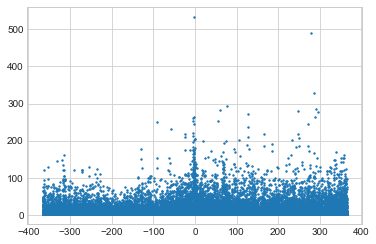

In [178]:
plt.scatter(grpedResults["daysRelative"],grpedResults["recordDate"], s=2)

In [179]:
grpedResults.to_csv('projects-3.csv')

In [180]:
after = grpedResults[grpedResults['daysRelative']>0]

In [181]:
before = grpedResults[grpedResults['daysRelative']< -10]

In [182]:
before.head()

,projectID,userID,daysRelative,eventDate,recordDate
0,11013,1,-359,10,10
1,11013,1,-357,1,1
2,11013,1,-353,130,130
3,11013,1,-352,27,27
4,11013,1,-345,24,24


In [183]:
before.groupby(['userID']).count().reset_index().describe()

,userID,projectID,daysRelative,eventDate,recordDate
count,4.330000e+02,433.000000,433.000000,433.000000,433.000000
mean,3.090812e+05,33.630485,33.630485,33.630485,33.630485
std,3.861627e+05,48.606862,48.606862,48.606862,48.606862
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,3.387200e+04,4.000000,4.000000,4.000000,4.000000
50%,2.119340e+05,14.000000,14.000000,14.000000,14.000000
75%,4.354690e+05,41.000000,41.000000,41.000000,41.000000
max,2.650187e+06,324.000000,324.000000,324.000000,324.000000


In [184]:
after.groupby(['userID']).count().reset_index().describe()

,userID,projectID,daysRelative,eventDate,recordDate
count,4.820000e+02,482.000000,482.000000,482.000000,482.000000
mean,3.439649e+05,43.338174,43.338174,43.338174,43.338174
std,4.354323e+05,60.310421,60.310421,60.310421,60.310421
min,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,3.499350e+04,5.000000,5.000000,5.000000,5.000000
50%,2.287435e+05,20.000000,20.000000,20.000000,20.000000
75%,4.457205e+05,55.750000,55.750000,55.750000,55.750000
max,2.650187e+06,412.000000,412.000000,412.000000,412.000000
